In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_excel('drive/MyDrive/Model Klasifikasi/ISPU 2021 Hasil Cleaning.xlsx')
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


In [4]:
df.shape

(1517, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1517 non-null   object
 1   stasiun   1517 non-null   object
 2   pm10      1517 non-null   int64 
 3   pm25      1517 non-null   int64 
 4   so2       1517 non-null   int64 
 5   co        1517 non-null   int64 
 6   o3        1517 non-null   int64 
 7   no2       1517 non-null   int64 
 8   max       1517 non-null   int64 
 9   critical  1517 non-null   object
 10  categori  1517 non-null   object
dtypes: int64(7), object(4)
memory usage: 130.5+ KB


In [6]:
df.categori.value_counts()

SEDANG         1147
TIDAK SEHAT     245
BAIK            125
Name: categori, dtype: int64

#### Data pre-processing

In [7]:
label_encoder = LabelEncoder()
df_encoder=df.copy()
for i in ['categori']:
    df_encoder[i] = label_encoder.fit_transform(df_encoder[i])

df_encoder

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,1
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,0
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,1
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,0
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,1
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,1
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,1
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,1
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,1


In [8]:
minmax = MinMaxScaler()
df_norm = pd.DataFrame(minmax.fit_transform(df.drop(columns=['tanggal','stasiun','critical','max','categori']).values),
                       columns=df.drop(columns=['tanggal','stasiun','critical','max','categori']).columns)
df_norm

,pm10,pm25,so2,co,o3,no2
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774
...,...,...,...,...,...,...
1512,0.237805,0.391304,0.4250,0.292683,0.090909,0.709677
1513,0.176829,0.341615,0.2250,0.219512,0.090909,0.483871
1514,0.115854,0.254658,0.3250,0.146341,0.118881,0.419355
1515,0.231707,0.385093,0.2875,0.317073,0.104895,0.661290


#### Membagi data set

In [9]:
X = df_norm
y = df_encoder['categori']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_test

,pm10,pm25,so2,co,o3,no2
724,0.304878,0.689441,0.4000,0.268293,0.132867,0.290323
812,0.274390,0.440994,0.5625,0.121951,0.104895,0.241935
1466,0.365854,0.639752,0.4125,0.512195,0.209790,0.290323
1469,0.292683,0.540373,0.4625,0.243902,0.076923,0.322581
51,0.079268,0.223602,0.2875,0.195122,0.314685,0.064516
...,...,...,...,...,...,...
358,0.176829,0.366460,0.4125,0.146341,0.069930,0.241935
1169,0.274390,0.434783,0.4500,0.195122,0.125874,0.516129
111,0.054878,0.136646,0.4500,0.048780,0.237762,0.193548
1292,0.079268,0.192547,0.3875,0.121951,0.034965,0.048387


In [12]:
y_test

724     2
812     1
1466    2
1469    1
51      1
       ..
358     1
1169    1
111     0
1292    0
816     2
Name: categori, Length: 304, dtype: int64

In [13]:
y_test.value_counts()

1    233
2     50
0     21
Name: categori, dtype: int64

#### Model MLP

In [14]:
from keras.utils import np_utils

y_train_mlp=np_utils.to_categorical(y_train,num_classes=3)
y_test_mlp=np_utils.to_categorical(y_test,num_classes=3)
print("y_train_mlp",y_train_mlp.shape)
print("y_test_mlp",y_test_mlp.shape)

y_train_mlp (1213, 3)
y_test_mlp (304, 3)


In [15]:
from tensorflow.keras.models import load_model

MLP = load_model('drive/MyDrive/Model Klasifikasi/Model Klasifikasi MLP.h5')

y_pred_mlp = MLP.predict(X_test, verbose=3)

In [16]:
y_test_fix = np.argmax(y_test_mlp,axis=1)
y_pred_fix = np.argmax(y_pred_mlp,axis=1)

In [17]:
cm_mlp = confusion_matrix(y_test_fix,y_pred_fix)
cm_mlp

array([[ 19,   2,   0],
       [  3, 230,   0],
       [  0,   3,  47]])

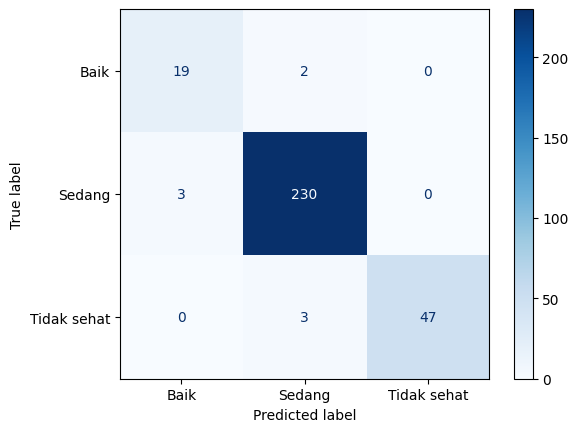

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['Baik', 'Sedang', 'Tidak sehat'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
print(classification_report(y_test_fix,y_pred_fix))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.98      0.99      0.98       233
           2       1.00      0.94      0.97        50

    accuracy                           0.97       304
   macro avg       0.95      0.94      0.95       304
weighted avg       0.97      0.97      0.97       304



#### Model Random Forest

In [21]:
import pickle

RF = pickle.load(open('drive/MyDrive/Model Klasifikasi/Model Klasifikasi Random Forest.sav', 'rb'))

y_pred_rf = RF.predict(X_test)

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[ 20   1   0]
 [  1 232   0]
 [  0   0  50]]


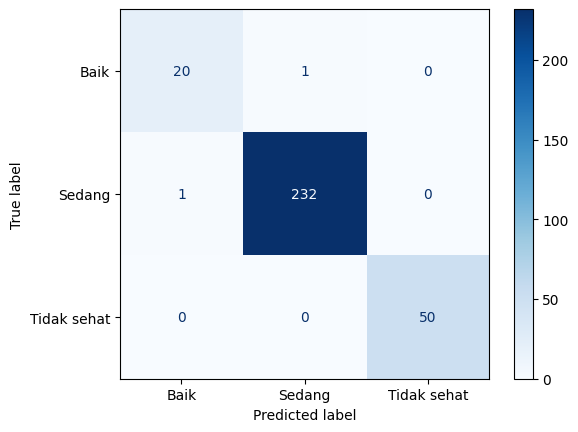

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Baik', 'Sedang', 'Tidak sehat'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00        50

    accuracy                           0.99       304
   macro avg       0.98      0.98      0.98       304
weighted avg       0.99      0.99      0.99       304



#### Perbandingan metrik evaluasi model klasifikasi MLP dan RF

In [25]:
acc_mlp  = accuracy_score(y_test_fix, y_pred_fix)
prec_mlp = precision_score(y_test_fix, y_pred_fix, average='macro')
rec_mlp  = recall_score(y_test_fix, y_pred_fix, average='macro')
f1_mlp   = f1_score(y_test_fix, y_pred_fix, average='macro')

In [26]:
acc_rf   = accuracy_score(y_test, y_pred_rf)
prec_rf  = precision_score(y_test, y_pred_rf, average='macro')
rec_rf   = recall_score(y_test, y_pred_rf, average='macro')
f1_rf    = f1_score(y_test, y_pred_rf ,average='macro')

In [28]:
df_skor = pd.DataFrame({'Akurasi':[acc_mlp, acc_rf],
                       'Presisi':[prec_mlp, prec_rf],
                       'Recall':[rec_mlp, rec_rf],
                       'F1_Score':[f1_mlp, f1_rf],
                       'Model':['MLP','RF']})
df_skor = df_skor.set_index(df_skor['Model']).drop(columns=['Model'])
df_skor.T

Model,MLP,RF
Akurasi,0.973684,0.993421
Presisi,0.947453,0.982696
Recall,0.943962,0.982696
F1_Score,0.945233,0.982696


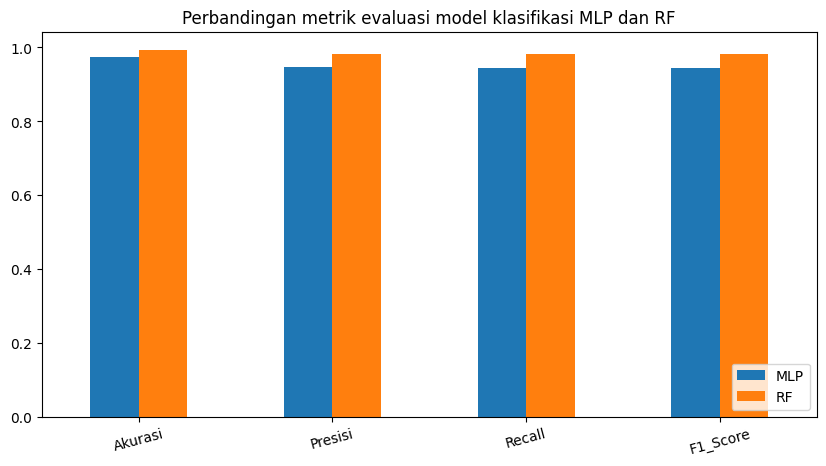

In [29]:
plt.rcParams["figure.figsize"] = (10, 5)
df_skor.T.plot.bar(rot=15, title="Perbandingan metrik evaluasi model klasifikasi MLP dan RF");
plt.legend(loc="lower right")
plt.show()

#### Evaluasi untuk prediksi kategori ISPU dengan data sintetis

In [30]:
X_Uji = pd.DataFrame(minmax.inverse_transform(X_test), columns=X_test.columns)
X_Uji['Aktual'] = label_encoder.inverse_transform(y_test)
X_Uji

,pm10,pm25,so2,co,o3,no2,Aktual
0,65.0,124.0,34.0,13.0,27.0,21.0,TIDAK SEHAT
1,60.0,84.0,47.0,7.0,23.0,18.0,SEDANG
2,75.0,116.0,35.0,23.0,38.0,21.0,TIDAK SEHAT
3,63.0,100.0,39.0,12.0,19.0,23.0,SEDANG
4,28.0,49.0,25.0,10.0,53.0,7.0,SEDANG
...,...,...,...,...,...,...,...
299,44.0,72.0,35.0,8.0,18.0,18.0,SEDANG
300,60.0,83.0,38.0,10.0,26.0,35.0,SEDANG
301,24.0,35.0,38.0,4.0,42.0,15.0,BAIK
302,28.0,44.0,33.0,7.0,13.0,6.0,BAIK


In [31]:
X_Uji.describe()

,pm10,pm25,so2,co,o3,no2
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,52.532895,78.720395,35.240132,12.032895,30.822368,20.006579
std,14.176827,22.902234,12.944598,4.604371,14.008296,9.344522
min,16.000000,20.000000,7.000000,2.000000,8.000000,3.000000
25%,44.000000,64.000000,25.000000,9.000000,20.000000,13.000000
50%,55.000000,79.000000,34.000000,11.500000,27.000000,18.000000
75%,62.000000,92.250000,44.250000,14.000000,38.000000,26.000000
max,94.000000,153.000000,81.000000,32.000000,80.000000,52.000000


Membuat data sintetis melihat pada persebaran data pada data test.
Nilai variabel polutan pada data test berada pada:



1. pm10 = rentang 16 hingga 94
2. pm25 = rentang 20 hingga 153
3. so2 = rentang 7 hingga 81
4. co = rentang 2 hingga 32
5. o3 = rentang 8 hingga 80
6. no2 = rentang 3 hingga 52

Dibuat data sintetis sebagai berikut :

In [32]:
pm10 = [50, 21, 56, 75, 67, 37, 23]
pm25 = [66, 41, 72, 111, 101, 58, 43]
so2  = [20, 13, 22, 50, 43, 44, 15]
co   = [17, 2, 28, 10, 6, 12, 3]
o3   = [19, 18, 21, 32, 31, 51, 20]
no2  = [39, 4, 47, 19, 15, 20, 6]

df_sintetis = pd.DataFrame({'pm10':pm10,
                            'pm25':pm25,
                            'so2':so2,
                            'co':co,
                            'o3':o3,
                            'no2':no2})
df_sintetis

,pm10,pm25,so2,co,o3,no2
0,50,66,20,17,19,39
1,21,41,13,2,18,4
2,56,72,22,28,21,47
3,75,111,50,10,32,19
4,67,101,43,6,31,15
5,37,58,44,12,51,20
6,23,43,15,3,20,6


In [33]:
df_sintetis_norm = pd.DataFrame(minmax.fit_transform(df_sintetis.values),columns=df_sintetis.columns)
df_sintetis_norm

,pm10,pm25,so2,co,o3,no2
0,0.537037,0.357143,0.189189,0.576923,0.030303,0.813953
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.648148,0.442857,0.243243,1.000000,0.090909,1.000000
3,1.000000,1.000000,1.000000,0.307692,0.424242,0.348837
4,0.851852,0.857143,0.810811,0.153846,0.393939,0.255814
5,0.296296,0.242857,0.837838,0.384615,1.000000,0.372093
6,0.037037,0.028571,0.054054,0.038462,0.060606,0.046512


#### Prediksi dengan Random Forest

In [34]:
RF = pickle.load(open('drive/MyDrive/Model Klasifikasi/Model Klasifikasi Random Forest.sav', 'rb'))

In [35]:
y_pred_sintetis_rf = RF.predict(df_sintetis_norm)
y_pred_sintetis_rf

array([1, 0, 1, 2, 2, 1, 0])

In [36]:
df_sintetis['Prediksi ISPU dengan RF'] = label_encoder.inverse_transform(y_pred_sintetis_rf)
df_sintetis

,pm10,pm25,so2,co,o3,no2,Prediksi ISPU dengan RF
0,50,66,20,17,19,39,SEDANG
1,21,41,13,2,18,4,BAIK
2,56,72,22,28,21,47,SEDANG
3,75,111,50,10,32,19,TIDAK SEHAT
4,67,101,43,6,31,15,TIDAK SEHAT
5,37,58,44,12,51,20,SEDANG
6,23,43,15,3,20,6,BAIK
